# Capstone Project - The Battle of Neighborhoods

## New York - Location for a new movie theater

## Description of the Problem and Discussion of the Background

New York is one of the weathiest states in United States and hence forms one of the biggest markets for movies. As the city becomes more cosmopolitan than ever before, new entertainment locations have popped up all across, including movie theaters. However it is essential for any new establishment to ensure that it is far enough from existing movie theaters to ensure good business. Here we will map out existing movie theaters in NYC and find out boroughs and neighborhoods that lack them. Such places would be the best location to start a new movie theater.

*Who will be more interested in this project?*
1. Established movie chains (AMC, Fox, IMAX etc) or any new entrant such as real estate agencies will find this data useful for land redevelopment projects.
2. Movie goers who can ask for local movie theaters if their borough lacks one.
4. Business Analyst or Data Scientists, who wish to analyze New York using Data Analysis to obtain all the necessary data, and analyze it as they see fit to tell a coherent story to the stakeholders.

## Description of the data and how it will be used to solve the problem

We would need geographical data for NY along with existing movie theaters. This data will be accordingly pre-processed, separated based on different boroughs and neighborhoods. The location of existing movie theaters would be then used to find locations suitable for new movie theaters.

## Data Acquisition and Methodology

### Data Acquisition

In order to understand and answer the problem, geographical data on New York City which includes Neighborhoods, Boroughs (including their coordinates) along with locations of existing movie theaters would be required.

Geopy would be used for coordinate data.

New York City data containing the neighborhoods and boroughs, latitudes, and longitudes will be obtained from [here](https://cocl.us/new_york_dataset)

All relevant geographical data for movie theaters will be obtained via the FourSquare API via the Request library in Python.

### Methodology
• NY geographical data collected from [here](https://cocl.us/new_york_dataset) would be pre processed accordingly and relevant sections would arranged in a pandas dataframe.

• Data obtained from Foursquare will be merged and overlaid over existing data from last step.

• Sorting and ranking would boroughs and neighborhoods would be done based on frequency of movie theaters.

• Data would be presented using bar graph using seaborn for easy visualization of results.

In [3]:
import pandas as pd
import numpy as np
import requests

!conda install -c conda-forge folium=0.5.0 --yes
import folium 

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

%matplotlib inline
import seaborn as sns

print('Depedencies locked and loaded')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    ------------------------------------------------------------
                       

## Loading and Assigning Variable

In [4]:
# Credentials deleted
CLIENT_ID = ""
CLIENT_SECRET = ""
VERSION = 20200407

In [5]:
# Defining functions

def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #code by https://github.com/TheDragon246
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

# New York data pre processed
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

Use function *get_new_york_data* to get geograhical data about New York

In [43]:
#Getting the New York Data
ny_data = get_new_york_data()
print(ny_data)

           Borough         Neighborhood   Latitude  Longitude
0            Bronx            Wakefield  40.894705 -73.847201
1            Bronx           Co-op City  40.874294 -73.829939
2            Bronx          Eastchester  40.887556 -73.827806
3            Bronx            Fieldston  40.895437 -73.905643
4            Bronx            Riverdale  40.890834 -73.912585
5            Bronx          Kingsbridge  40.881687 -73.902818
6        Manhattan          Marble Hill  40.876551 -73.910660
7            Bronx             Woodlawn  40.898273 -73.867315
8            Bronx              Norwood  40.877224 -73.879391
9            Bronx       Williamsbridge  40.881039 -73.857446
10           Bronx           Baychester  40.866858 -73.835798
11           Bronx       Pelham Parkway  40.857413 -73.854756
12           Bronx          City Island  40.847247 -73.786488
13           Bronx         Bedford Park  40.870185 -73.885512
14           Bronx   University Heights  40.855727 -73.910416
15      

In [35]:
ny_data.shape

(306, 4)

#### Exploratory Analysis

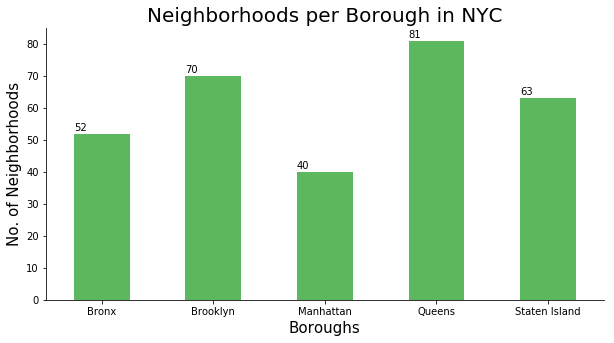

In [8]:
# Analyzing the data to show Neigborhood per Borough in NYC

clr = "#5cb85c"
ax = ny_data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Neighborhoods per Borough in NYC', fontsize = 20) #https://github.com/TheDragon246
plt.xlabel('Boroughs', fontsize = 15)
plt.ylabel('No. of Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
for p in ax.patches:
    width, height = p.get_width(),p.get_height()
    x,y = p.get_xy()
    ax.annotate('{:}'.format(height), (x, height + 1))
plt.show()

As seen above, __Manhattan__ has lowest and __Queens__ has highest number of boroughs respectively.

In [53]:
# prepare dataframe combining information collected above with movie theater locations
column_names=['Name','Borough', 'Neighborhood', 'Latitude', 'Longitude']
movie_ny=pd.DataFrame(columns=column_names)
count=1
for row in ny_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    movie_theater=venues[venues['Category']=='Movie Theater']   
    print('(',count,'/',len(ny_data),')','Movie theaters in '+Neighborhood+', '+Borough+':'+str(len(movie_theater)))
    print(row)
    for theater_detail in movie_theater.values.tolist():
        id, name , category=theater_detail
        movie_ny = movie_ny.append({'Name' : name,
                                                  'Borough': Borough,
                                                  'Neighborhood': Neighborhood, 
                                                  'Latitude': Latitude,
                                                  'Longitude': Longitude
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Movie theaters in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Movie theaters in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Movie theaters in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Movie theaters in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Movie theaters in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Movie theaters in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Movie theaters in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Movie theaters in Woodlawn, Bronx:0
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Movie theaters in Norwood, Bronx:0
['Bronx', 'Norwood', 40.87722415599446, -73.879

In [55]:
movie_ny #combined dataframe

,Name,Borough,Neighborhood,Latitude,Longitude
0,Alamo Drafthouse Cinema,Brooklyn,Downtown,40.690844,-73.983463
1,Williamsburg Cinemas,Brooklyn,North Side,40.714823,-73.958809
2,Nitehawk Cinema,Brooklyn,North Side,40.714823,-73.958809
3,Williamsburg Cinemas,Brooklyn,South Side,40.710861,-73.958001
4,AMC Loews 84th Street 6,Manhattan,Upper West Side,40.787658,-73.977059
5,AMC Lincoln Square 13,Manhattan,Lincoln Square,40.773529,-73.985338
6,Francesca Beale Theatre,Manhattan,Lincoln Square,40.773529,-73.985338
7,Yotel - Rooftop Cinema Club,Manhattan,Clinton,40.759101,-73.996119
8,Regal Battery Park,Manhattan,Battery Park City,40.711932,-74.016869
9,The 7 Train Theater,Queens,Flushing,40.764454,-73.831773


__Twelve__ movie theaters are present in New York. The dataframe has all the required columns as seen above.

In [57]:
# Dataframe saved into a .csv file for easy retrival
movie_ny.to_csv('movie_theater.csv') 

movie_ny = pd.read_csv('movie_theater.csv')
movie_ny.head()

,Unnamed: 0,Unnamed: 0.1,Name,Borough,Neighborhood,Latitude,Longitude
0,0,0,Alamo Drafthouse Cinema,Brooklyn,Downtown,40.690844,-73.983463
1,1,1,Williamsburg Cinemas,Brooklyn,North Side,40.714823,-73.958809
2,2,2,Nitehawk Cinema,Brooklyn,North Side,40.714823,-73.958809
3,3,3,Williamsburg Cinemas,Brooklyn,South Side,40.710861,-73.958001
4,4,4,AMC Loews 84th Street 6,Manhattan,Upper West Side,40.787658,-73.977059


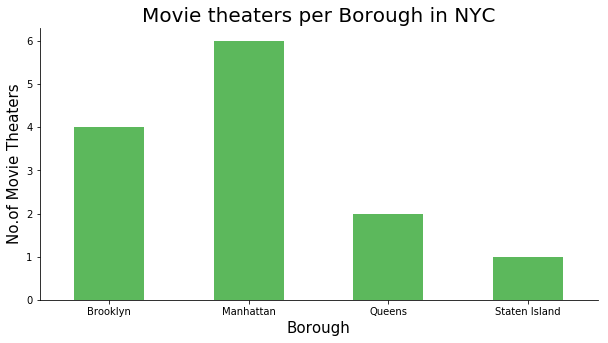

In [59]:
# Number of movie theaters per borough
movie_ny.groupby('Borough')['Name'].count().plot.bar(figsize=(10,5), color = clr)
plt.title('Movie theaters per Borough in NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No.of Movie Theaters', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Manhattan has highest number of movie theaters (6). Bronx has none.

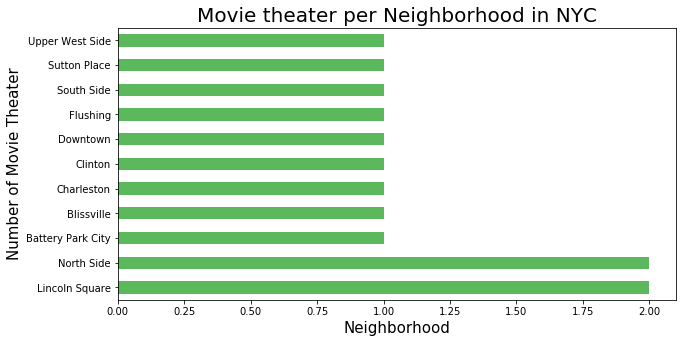

In [60]:
NOofNeigh = 20 # starting from most number of movie theaters
movie_ny.groupby('Neighborhood')['Name'].count().nlargest(NOofNeigh).plot.barh(figsize=(10,5), color=clr)
plt.title('Movie theater per Neighborhood in NYC', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('Number of Movie Theater', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

Out of 302 neighborhoods, only 11 neighborhoods have a movie theater, with *North Side* and *Lincoln Square* having two each.

In [61]:
movie_ny[movie_ny['Neighborhood']=='Lincoln Square'] # location of 2 movie theaters in Lincoln Square

,Unnamed: 0,Unnamed: 0.1,Name,Borough,Neighborhood,Latitude,Longitude
5,5,5,AMC Lincoln Square 13,Manhattan,Lincoln Square,40.773529,-73.985338
6,6,6,Francesca Beale Theatre,Manhattan,Lincoln Square,40.773529,-73.985338


In [62]:
# location of all movie theaters in NYC
movie_stats_ny = movie_ny
movie_stats_ny

,Unnamed: 0,Unnamed: 0.1,Name,Borough,Neighborhood,Latitude,Longitude
0,0,0,Alamo Drafthouse Cinema,Brooklyn,Downtown,40.690844,-73.983463
1,1,1,Williamsburg Cinemas,Brooklyn,North Side,40.714823,-73.958809
2,2,2,Nitehawk Cinema,Brooklyn,North Side,40.714823,-73.958809
3,3,3,Williamsburg Cinemas,Brooklyn,South Side,40.710861,-73.958001
4,4,4,AMC Loews 84th Street 6,Manhattan,Upper West Side,40.787658,-73.977059
5,5,5,AMC Lincoln Square 13,Manhattan,Lincoln Square,40.773529,-73.985338
6,6,6,Francesca Beale Theatre,Manhattan,Lincoln Square,40.773529,-73.985338
7,7,7,Yotel - Rooftop Cinema Club,Manhattan,Clinton,40.759101,-73.996119
8,8,8,Regal Battery Park,Manhattan,Battery Park City,40.711932,-74.016869
9,9,9,The 7 Train Theater,Queens,Flushing,40.764454,-73.831773


In [65]:
# create map of New York using latitude and longitude values via folium
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)

# add movie theaters as markers, with labels containing their name and location
for lat, lng, name, borough in zip(movie_stats_ny['Latitude'], movie_stats_ny['Longitude'], movie_stats_ny['Name'], movie_stats_ny['Borough']):
    label = '{}, {}'.format(name, borough)
    label = folium.Popup(label, parse_html=True)  #dragon code
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(ny_map)  
    
ny_map



## Discussion

With presence of large affluent population with disposable income and its cosmopolitan nature, New York is one of the best destinations in the world for an entertainment enterprise, such as movie theater. We have located 13 movie theaters in NYC area, which are located in __5__ out of 6 boroughs and only __11__ out of 302 neighborhoods. Bronx, being the only borough with no movie theater, is an ideal place to establish a new movie theater. Whereas the market is probably saturated in Manhattan borough and its neighborhoods. 

## Conclusion

We have successfully analysed New York geograhical data and combined it with the presence of an entity (movie theater) to establish potential locations for establishment of new entities. This analysis can be repeated with minimal change for analysis of all entities using Foursquare API or any other location service to establish ideal locations for new businesses.